In [1]:
#Dependencies for analysis with pandas and numpy
import pandas as pd
import numpy as np

import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
#Dependencies for graphs
import seaborn as sns
import matplotlib.pyplot as plt

#Dependencies for plotly
#import plotly.graph_objs as plotly
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)

#Dependencies for stat analysis with sklearn
#from sklearn.feature_extraction.text import CountVectorizer 
#from sklearn.model_selection import train_test_split


In [2]:
#Import data
wine_df = pd.read_csv('winemag-data-130k-v2.csv')
wine_df.head(5)

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [3]:
# import matplotlib
# matplotlib.use('nbagg')
# from matplotlib import style
# style.use('fivethirtyeight')
#import matplotlib.pyplot as plt

In [7]:
import sqlalchemy
from sqlalchemy import create_engine, MetaData, inspect, func
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session



In [8]:
!rm wine.sqlite 

rm: cannot remove 'wine.sqlite': No such file or directory


In [9]:
engine=create_engine("sqlite:///wine.sqlite")

In [10]:
conn=engine.connect()

In [11]:
Base = declarative_base()

In [12]:
class Wine(Base):
    __tablename__='wine'
    id = Column(Integer, primary_key=True)
    country = Column(String)
    description= Column(String)
    designation= Column(String)
    points= Column(Numeric)
    price= Column(Numeric)
    province= Column(String)
    region_1= Column(String)
    region_2= Column(String)
    taster_name = Column(String)
    taster_twitter_handle = Column(String)
    title = Column(String)
    variety= Column(String)
    winery= Column(String)
    
    def __repr__(self):
        return f"id={self.id}, description={self.description}"

In [13]:
Base.metadata.create_all(engine)

In [14]:
wine_data=wine_df.to_dict(orient='records')

In [15]:
print(wine_data[:5])

[{'Unnamed: 0': 0, 'country': 'Italy', 'description': "Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.", 'designation': 'Vulkà Bianco', 'points': 87, 'price': nan, 'province': 'Sicily & Sardinia', 'region_1': 'Etna', 'region_2': nan, 'taster_name': 'Kerin O’Keefe', 'taster_twitter_handle': '@kerinokeefe', 'title': 'Nicosia 2013 Vulkà Bianco  (Etna)', 'variety': 'White Blend', 'winery': 'Nicosia'}, {'Unnamed: 0': 1, 'country': 'Portugal', 'description': "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.", 'designation': 'Avidagos', 'points': 87, 'price': 15.0, 'province': 'Douro', 'region_1': nan, 'region_2': nan, 'taster_name': 'Roger Voss', 'taster_twitter_handle': '@vossroger', 'title':

In [16]:
metadata=MetaData(bind=engine)
metadata.reflect()

In [17]:
table = sqlalchemy.Table('wine', metadata,autoload=True)

In [18]:
conn.execute(table.insert(), wine_data)
conn.execute("select * from wine limit 5").fetchall()

[(1, 'Italy', "Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.", 'Vulkà Bianco', 87, None, 'Sicily & Sardinia', 'Etna', None, 'Kerin O’Keefe', '@kerinokeefe', 'Nicosia 2013 Vulkà Bianco  (Etna)', 'White Blend', 'Nicosia'),
 (2, 'Portugal', "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.", 'Avidagos', 87, 15, 'Douro', None, None, 'Roger Voss', '@vossroger', 'Quinta dos Avidagos 2011 Avidagos Red (Douro)', 'Portuguese Red', 'Quinta dos Avidagos'),
 (3, 'US', 'Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.', None, 87, 14, 'Oregon', 'Willamette Valley'

In [19]:
inspector = inspect(engine)
columns = inspector.get_columns('wine')
for c in columns:
    print (c['name'], c['type'])

id INTEGER
country VARCHAR
description VARCHAR
designation VARCHAR
points NUMERIC
price NUMERIC
province VARCHAR
region_1 VARCHAR
region_2 VARCHAR
taster_name VARCHAR
taster_twitter_handle VARCHAR
title VARCHAR
variety VARCHAR
winery VARCHAR


In [20]:
Base_auto = automap_base()
Base_auto.prepare(engine, reflect=True)
winebase=Base_auto.classes.wine


In [21]:
session=Session(engine)

In [22]:
wine_func = [winebase.country,
            func.avg(winebase.points),
            func.avg(winebase.price)]

In [23]:
wine_avg=session.query(*wine_func).group_by(winebase.country).order_by(winebase.country).all()

In [24]:
wine_avg

[(None, 88.63492063492063, 24.593220338983052),
 ('Argentina', 86.71026315789474, 24.510117145899894),
 ('Armenia', 87.5, 14.5),
 ('Australia', 88.58050665521684, 35.43766346992153),
 ('Austria', 90.10134529147982, 30.76277241872097),
 ('Bosnia and Herzegovina', 86.5, 12.5),
 ('Brazil', 84.67307692307692, 23.76595744680851),
 ('Bulgaria', 87.93617021276596, 14.645390070921986),
 ('Canada', 89.36964980544747, 35.71259842519685),
 ('Chile', 86.4935152057245, 20.786458333333332),
 ('China', 89.0, 18.0),
 ('Croatia', 87.21917808219177, 25.450704225352112),
 ('Cyprus', 87.18181818181819, 16.272727272727273),
 ('Czech Republic', 87.25, 24.25),
 ('Egypt', 84.0, None),
 ('England', 91.58108108108108, 51.68115942028985),
 ('France', 88.84510931064138, 41.139120162016205),
 ('Georgia', 87.68604651162791, 19.321428571428573),
 ('Germany', 89.85173210161663, 42.25754716981132),
 ('Greece', 87.28326180257511, 22.364425162689805),
 ('Hungary', 89.1917808219178, 40.648275862068964),
 ('India', 90.222

<IPython.core.display.Javascript object>


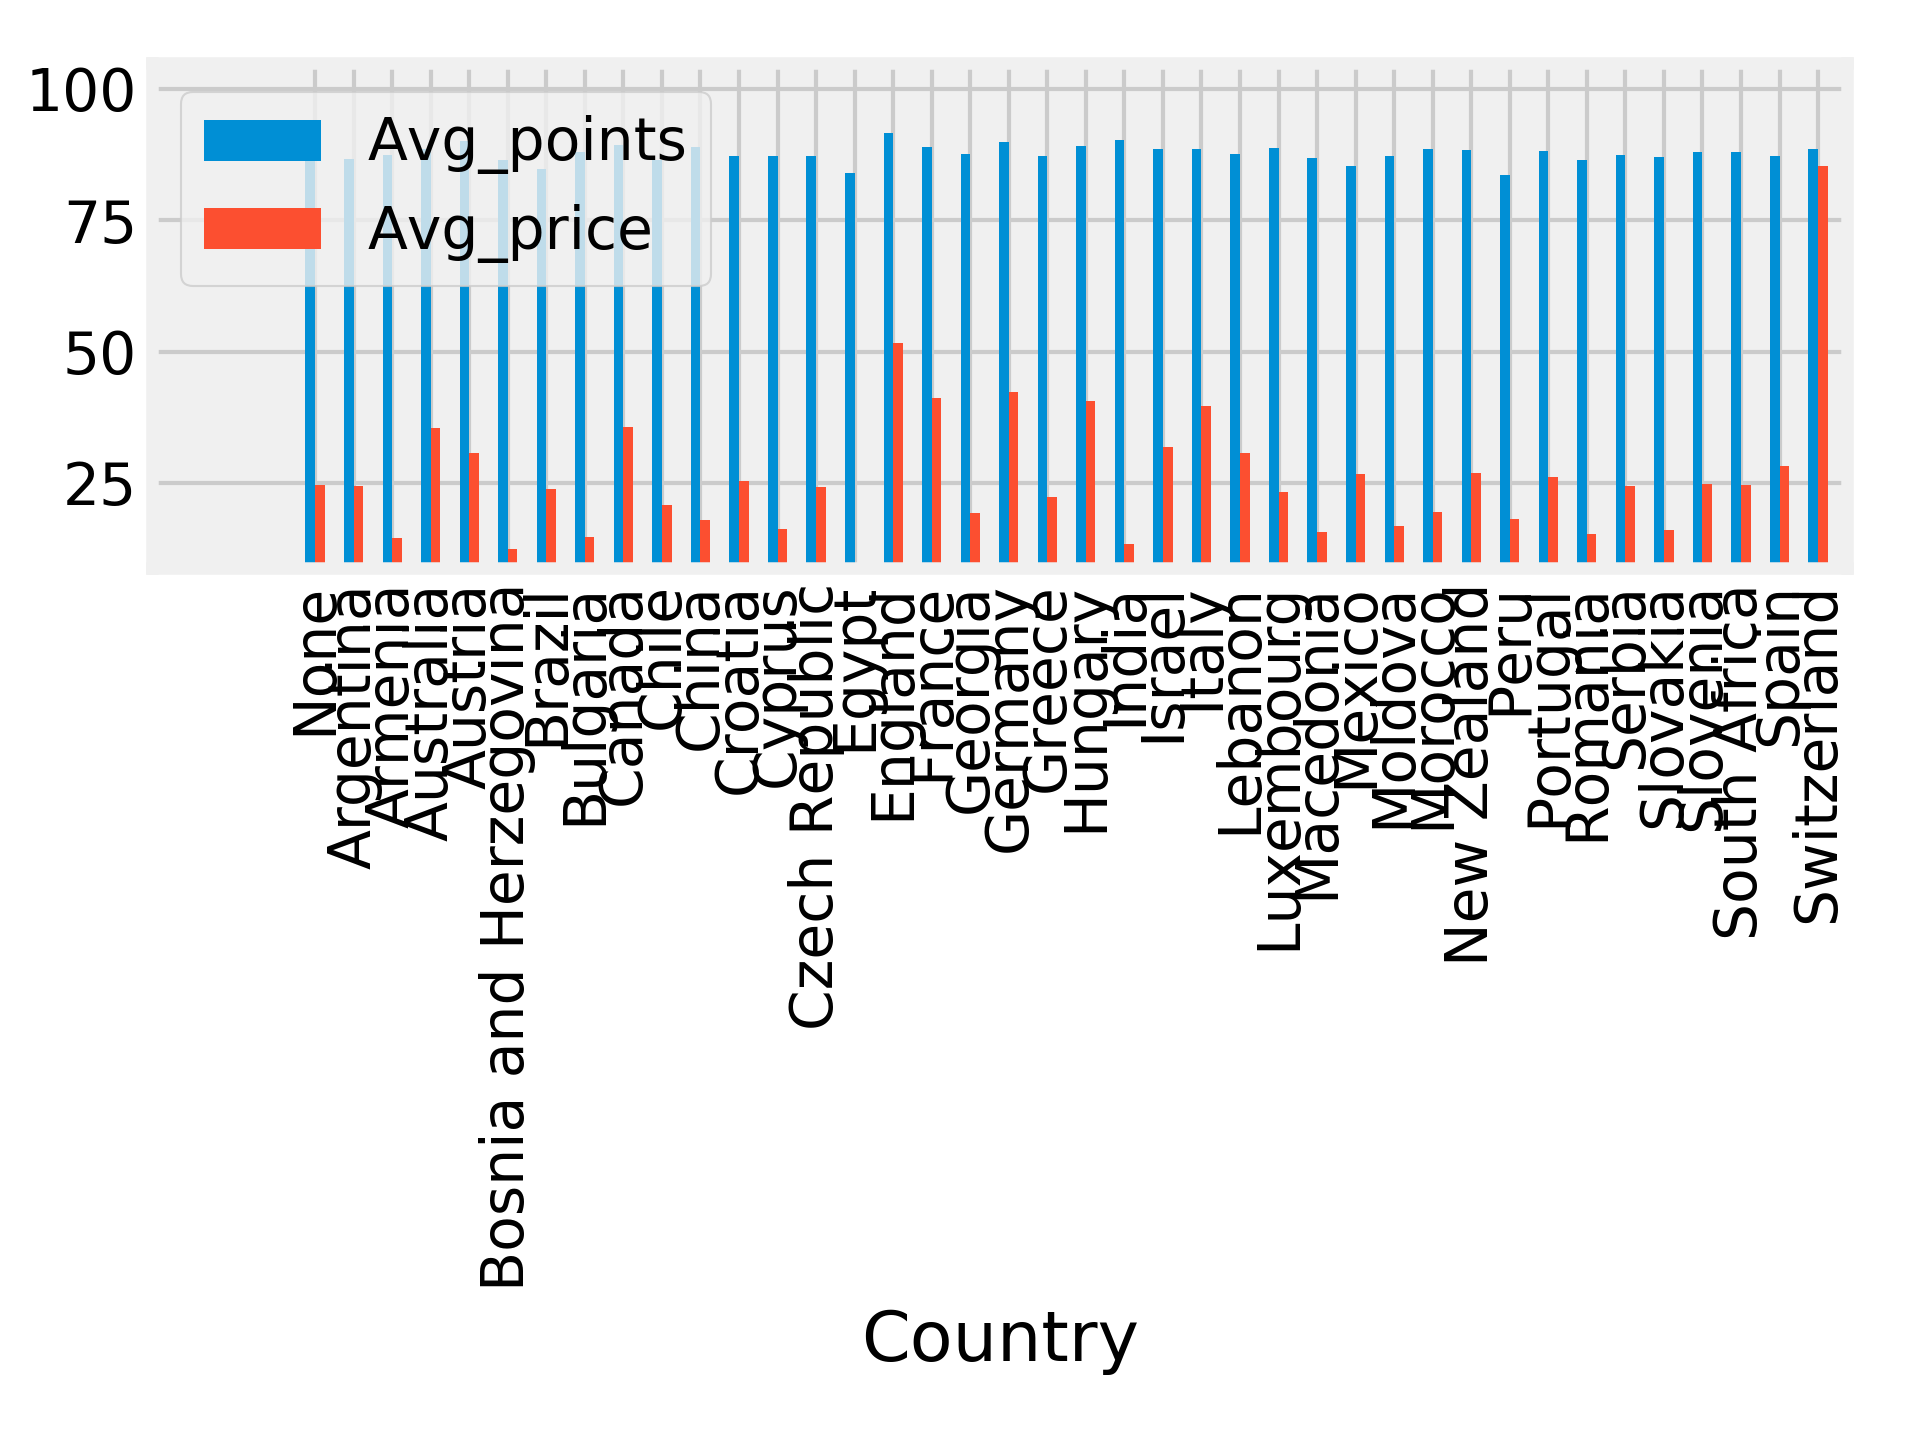

In [25]:
df=pd.DataFrame(wine_avg, columns=["Country","Avg_points","Avg_price"])
df.set_index("Country",inplace=True)
df.plot.bar()
plt.tight_layout()
plt.show()